### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 

### Objectives
Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. You are also supposed to use dimensionality reduction using PCA to get the visualisations of the clusters in a 2-D form. 

In [1313]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [1314]:
#reading the data
ngo_data = pd.read_csv("Country-data.csv")

In [1315]:
print(len(ngo_data))

167


### Let's understand the structure of our dataframe

In [1316]:
# Let's see the head of the dataset
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1317]:
ngo_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1318]:
ngo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [1319]:
# Checking for outliers in the continuous variables
num_ngo=ngo_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [1320]:
# Checking the percentage of missing values
round(100*(num_ngo.isnull().sum()/len(num_ngo.index)), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Feature Standardisation

In [1321]:
# Normalising continuous features
df = ngo_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

normalized_df=(df-df.mean())/df.std()
num_ngo = num_ngo.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
num_ngo = pd.concat([num_ngo,normalized_df],axis=1)
num_ngo.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [1322]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [1323]:
#Doing the PCA on the data
pca.fit(num_ngo)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [1324]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [1325]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

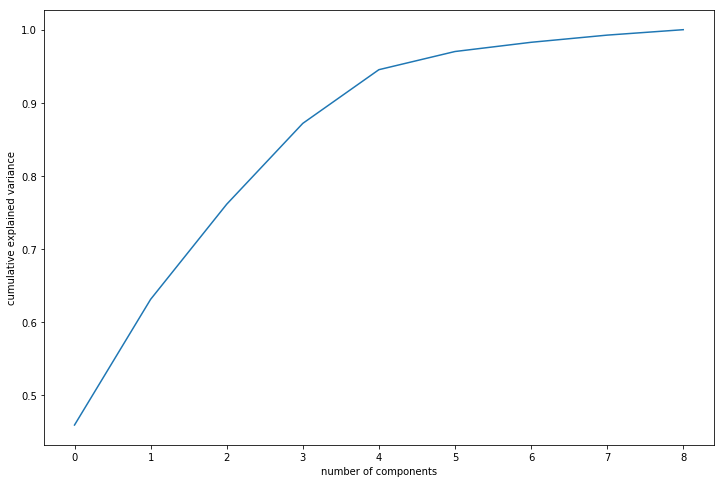

In [1326]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our clustering

In [1327]:
colnames = list(num_ngo.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


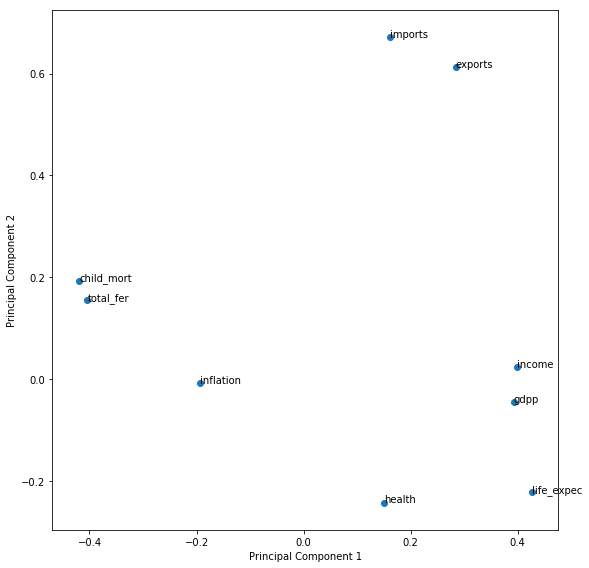

In [1328]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [1329]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [1330]:
df_train_pca = pca_final.fit_transform(num_ngo)
df_train_pca.shape

(167, 4)

In [1331]:
df_pca = pd.DataFrame(df_train_pca)
df_pca.columns = ['PC1', 'PC2','PC3','PC4']
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


#### Creating correlation matrix for the principal components - we expect little to no correlation

In [1332]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

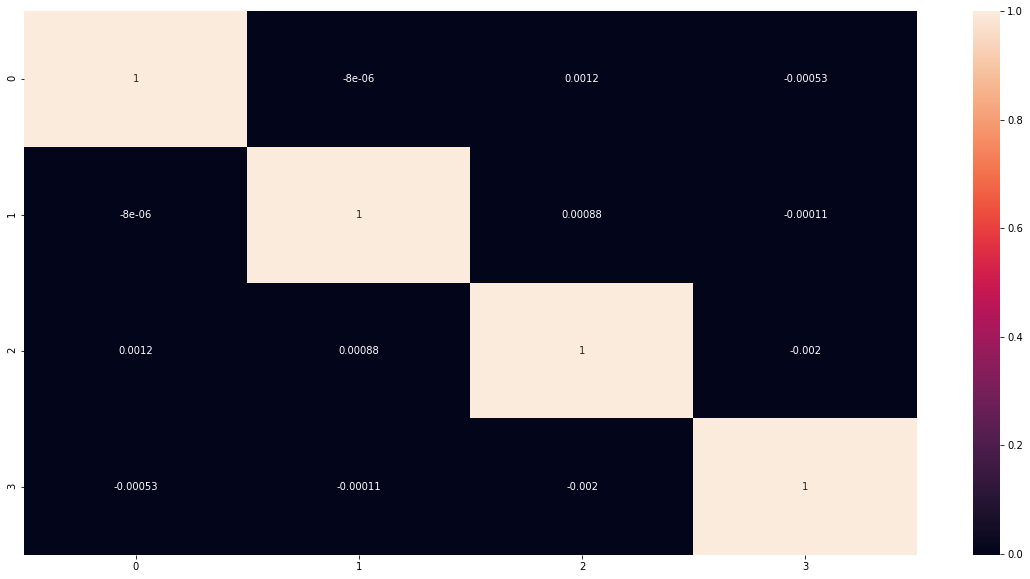

In [1333]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [1334]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092542815 , min corr:  -0.0020378295355501647


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [1335]:
country = pd.DataFrame(ngo_data['country'])
country.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [1336]:
df_pca = pd.concat([country, df_pca], axis=1)
df_pca.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710
1,Albania,0.428070,-0.586096,0.320090,-1.167681
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578
3,Angola,-2.922180,1.694341,-1.517172,0.873340
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275


In [1337]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_pca.describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-4.254747e-17,-1.628770e-17,-1.379469e-17,1.994413e-18
std,2.033610e+00,1.243405e+00,1.080123e+00,9.972386e-01
min,-4.864295e+00,-2.982227e+00,-5.573507e+00,-1.577417e+00
5%,-3.072555e+00,-1.759225e+00,-1.728803e+00,-1.165264e+00
25%,-1.379425e+00,-7.458916e-01,-4.142286e-01,-7.877837e-01
50%,2.411118e-02,-9.316020e-02,1.931701e-01,-2.930648e-01
75%,1.220561e+00,5.552236e-01,5.125301e-01,7.069460e-01
90%,2.453951e+00,1.272509e+00,1.064768e+00,1.223247e+00
95%,3.095881e+00,1.711014e+00,1.460947e+00,1.770400e+00


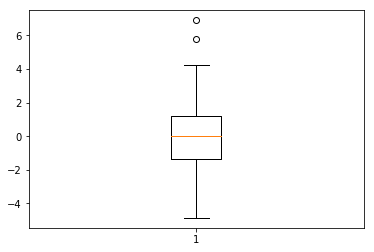

In [1338]:
# outlier treatment for Principal Component 1
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]
#df_pca

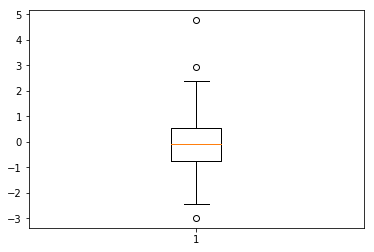

In [1339]:
# outlier treatment for Principal Component 2
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]
#df_pca

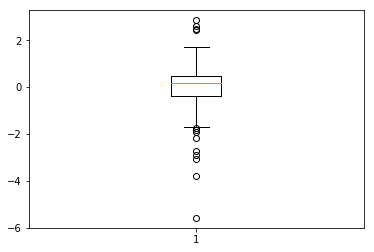

In [1340]:
# outlier treatment for Principal Component 3
plt.boxplot(df_pca.PC3)
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]
#df_pca

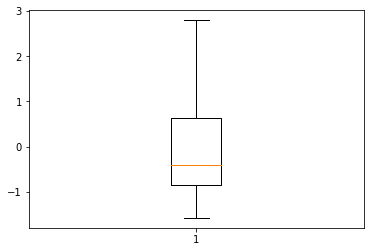

In [1341]:
# outlier treatment for Principal Component 4
plt.boxplot(df_pca.PC4)
Q1 = df_pca.PC4.quantile(0.25)
Q3 = df_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC4 >= Q1 - 1.5*IQR) & (df_pca.PC4 <= Q3 + 1.5*IQR)]
#df_pca

In [1342]:
df_pca.shape

(149, 5)

In [1343]:
outliers_df = df_pca
country_1 = pd.DataFrame(df_pca["country"])
country_1.shape
outliers_df.head()
# We will be using df_pca 

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710
1,Albania,0.428070,-0.586096,0.320090,-1.167681
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578
3,Angola,-2.922180,1.694341,-1.517172,0.873340
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275


In [1344]:
df_pca = df_pca.drop(['country'],1)
df_pca.head()
print(df_pca.shape)

(149, 4)


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [1345]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1346]:
hopkins(df_pca)

0.7177343085475029

## K-Means with taking K=4

In [1347]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [1348]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

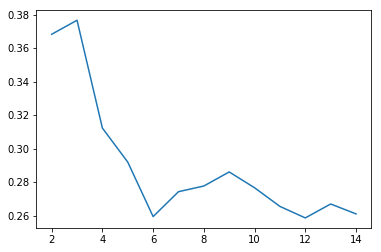

In [1349]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

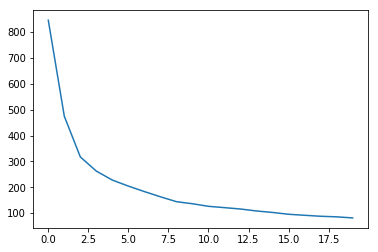

In [1350]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

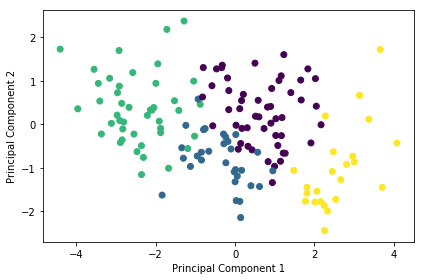

In [1351]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [1352]:
# analysis of clusters formed
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km = pd.concat([df_pca, pd.Series(model_clus4.labels_)], axis=1)

In [1353]:
df_pca_km.columns = ['PC1', 'PC2', 'PC3', 'PC4','ClusterID']
df_pca_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,2
1,0.428070,-0.586096,0.320090,-1.167681,0
2,-0.282140,-0.445318,-1.221462,-0.847578,1
3,-2.922180,1.694341,-1.517172,0.873340,2
4,1.028893,0.130097,0.192344,-0.842275,0


In [1354]:
df_pca_km = pd.merge(df_pca_km,country_1,on=df_pca_km['PC1'])
df_pca_km.shape

(149, 7)

In [1355]:
df_pca_km = df_pca_km.drop('key_0', 1)
df_pca_km.head()

,PC1,PC2,PC3,PC4,ClusterID,country
0,-2.905050,0.088089,0.718841,0.993710,2,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,0,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,1,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,2,Angola
4,1.028893,0.130097,0.192344,-0.842275,0,Antigua and Barbuda


In [1356]:
df_clusterid1 = pd.merge(df_pca_km,ngo_data,on='country',how='inner')
df_clusterid1.head()

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,2,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,2,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1357]:
df_clusterid1.shape

(149, 15)

In [1358]:
km_clusters_child_mort = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).gdpp.mean())
km_clusters_PC1 = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).PC4.mean())

In [1359]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,16.570588,50.349020,6.785490,58.641176,14087.843137,4.199510,73.535294,2.102157,8296.784314,0.668673,0.281362,0.344577,-0.778649
1,1,28.543750,26.355906,5.526563,30.773934,10455.937500,10.464875,72.353125,2.444063,5098.625000,-0.365017,-0.793895,-0.448509,-0.744528
2,2,92.732558,29.604884,6.069535,39.495349,4077.511628,10.460116,59.379070,5.055349,1977.558140,-2.428783,0.364019,0.061477,0.641638
3,3,4.117391,42.986957,10.144348,40.295652,39365.217391,1.238957,80.926087,1.795217,44330.434783,2.567886,-1.027286,0.335606,1.006165


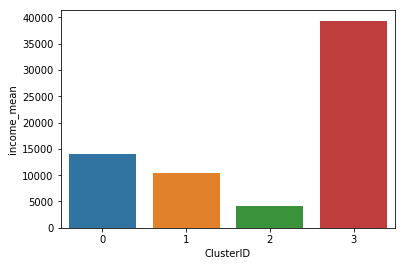

In [1360]:
sns.barplot(x=df.ClusterID, y=df.income_mean)

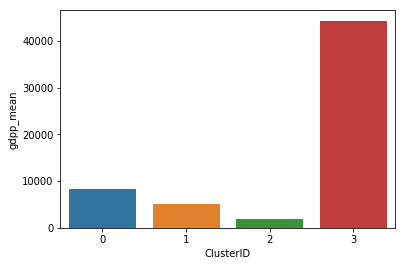

In [1361]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

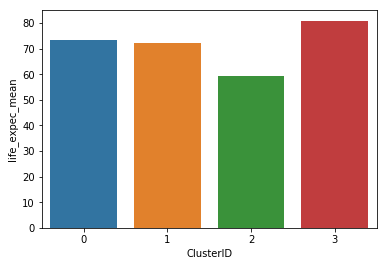

In [1362]:
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

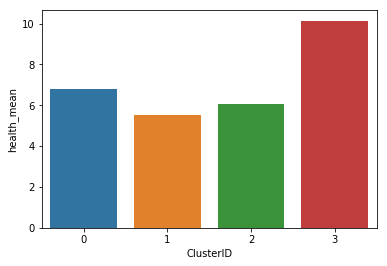

In [1363]:
sns.barplot(x=df.ClusterID, y=df.health_mean)

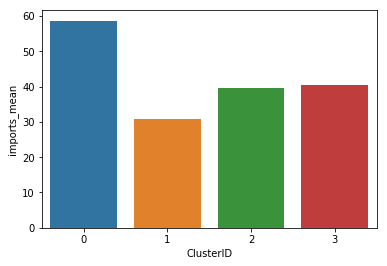

In [1364]:
sns.barplot(x=df.ClusterID, y=df.imports_mean)

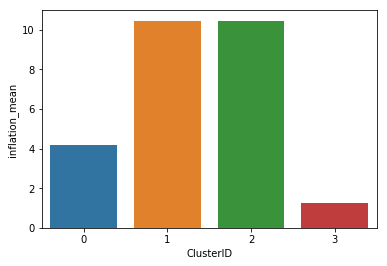

In [1365]:
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

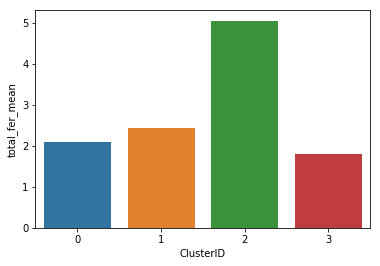

In [1366]:
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

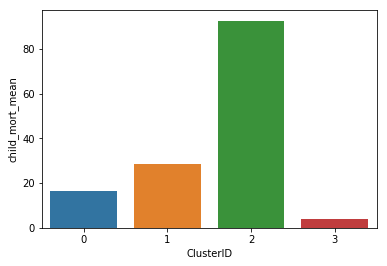

In [1367]:
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

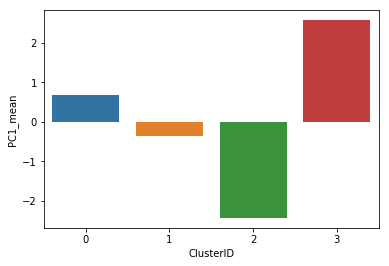

In [1368]:
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

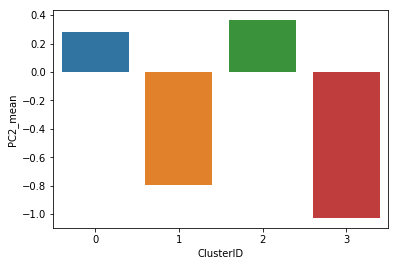

In [1369]:
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

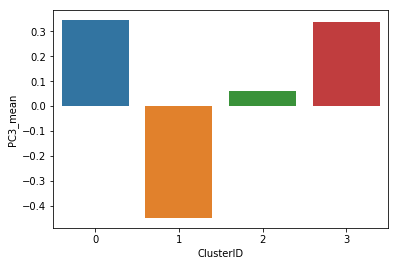

In [1370]:
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

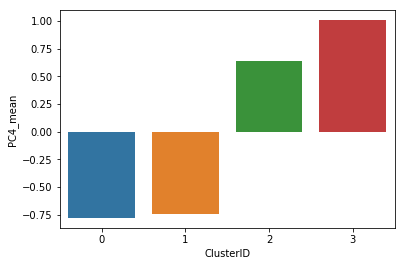

In [1371]:
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

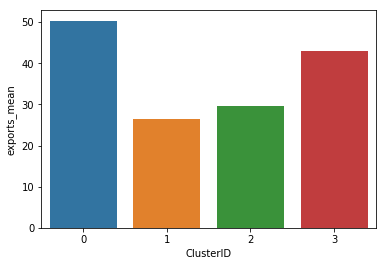

In [1372]:
sns.barplot(x=df.ClusterID, y=df.exports_mean)

In [1373]:
pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).country.count())

,country
ClusterID,
0,51
1,32
2,43
3,23


<hr>

## Heirarchical Clustering

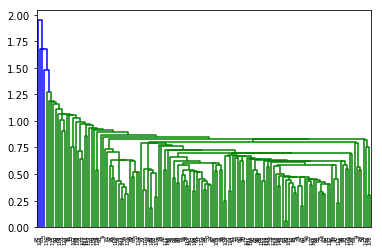

In [1374]:
# heirarchical clustering
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

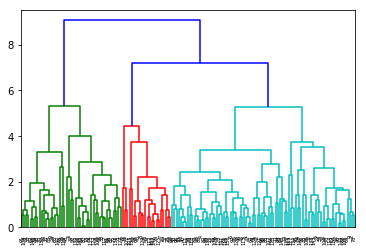

In [1375]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [1376]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clusterCut.shape
clusterCut_df = pd.DataFrame(clusterCut)

In [1377]:
clusterCut_df = clusterCut_df.reset_index()
clusterCut_df.shape

(149, 2)

In [1378]:
outliers_df = outliers_df.reset_index()
outliers_df.shape

(149, 6)

In [1379]:
country_hc = pd.concat([outliers_df, clusterCut_df], axis=1)
country_hc = country_hc.drop('index', 1)
country_hc.head()

,country,PC1,PC2,PC3,PC4,0
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,1


In [1380]:
#country_hc = country_hc.drop('level_0', 1)
country_hc.columns = ["country", "PC1", "PC2", "PC3","PC4","ClusterID"]
country_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,1


In [1381]:
df_clusterid2 = pd.merge(country_hc,ngo_data,on='country',how='inner')
df_clusterid2.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1382]:
#PC_km.PC4 = PC_km.PC4.dt.days

km_clusters_child_mort = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).gdpp.mean())

km_clusters_PC1 = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).PC4.mean())

In [1383]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,116.165000,23.691000,6.658000,38.615000,1562.150000,8.408250,55.170000,5.642000,663.550000,-3.109356,0.429572,0.435962,1.082296
1,1,22.948780,38.669256,6.368537,44.115438,13075.853659,7.392244,73.229268,2.342195,7401.743902,0.184744,-0.283343,-0.037027,-0.672923
2,2,61.764000,44.152000,5.517200,53.876000,6145.600000,8.940800,63.608000,3.978800,2980.520000,-1.308202,0.777330,0.039969,-0.100072
3,3,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182,2.581300,-1.082748,0.313695,1.055989


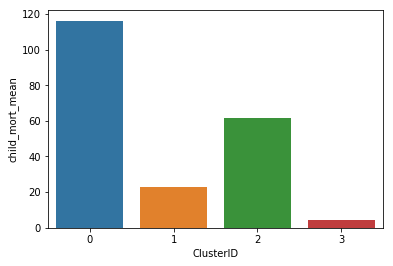

In [1384]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

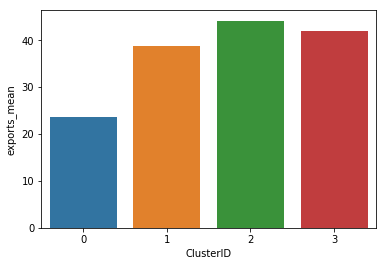

In [1385]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.exports_mean)

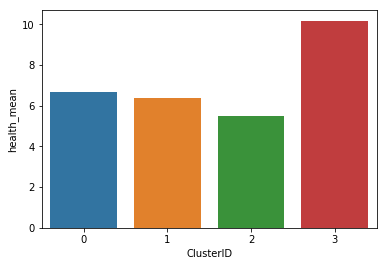

In [1386]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.health_mean)

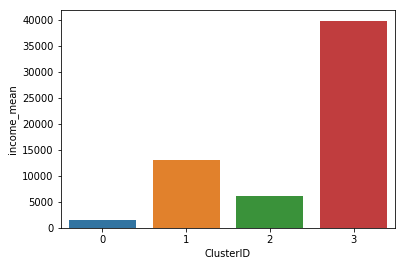

In [1387]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.income_mean)

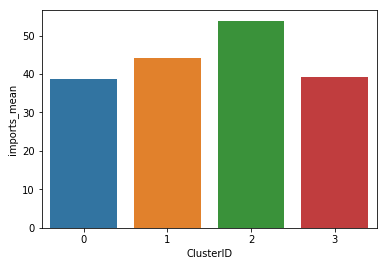

In [1388]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.imports_mean)

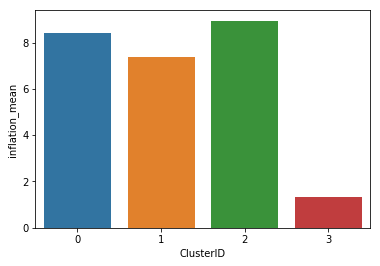

In [1389]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

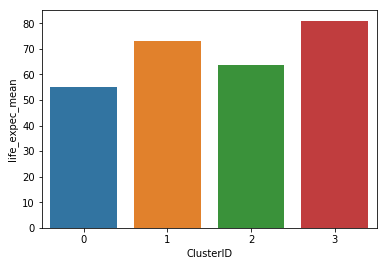

In [1390]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

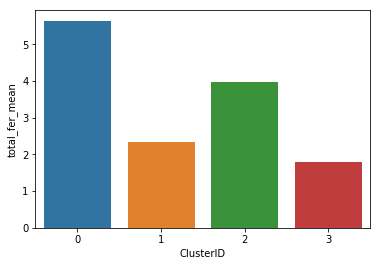

In [1391]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

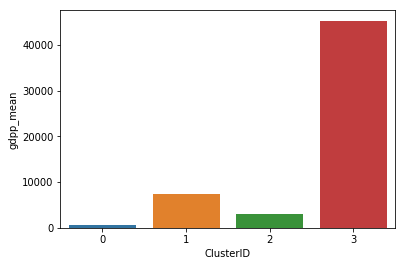

In [1392]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

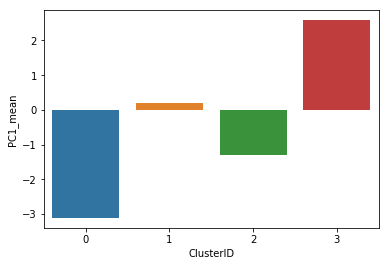

In [1393]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

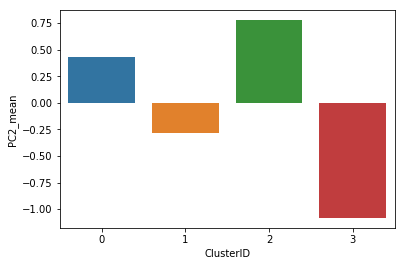

In [1394]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

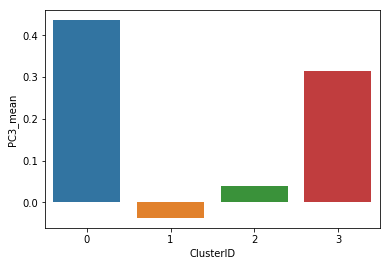

In [1395]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

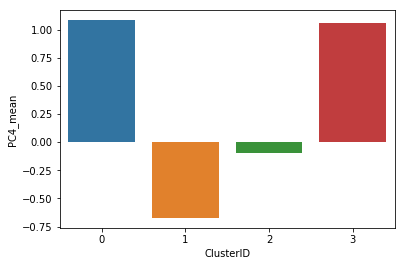

In [1396]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

In [1397]:
df1 = df_clusterid2.loc[df_clusterid2['ClusterID'] == 0]
result = df1.country
result

0                   Afghanistan
17                        Benin
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
36             Congo, Dem. Rep.
39                Cote d'Ivoire
62                       Guinea
63                Guinea-Bissau
65                        Haiti
88                       Malawi
91                         Mali
98                   Mozambique
104                       Niger
119                Sierra Leone
132                    Tanzania
140                      Uganda
148                      Zambia
Name: country, dtype: object

In [1398]:
result.shape

(20,)

In [1399]:
pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).country.count())

,country
ClusterID,
0,20
1,82
2,25
3,22


## K-Means with K = 3

In [1400]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50)
model_clus3.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

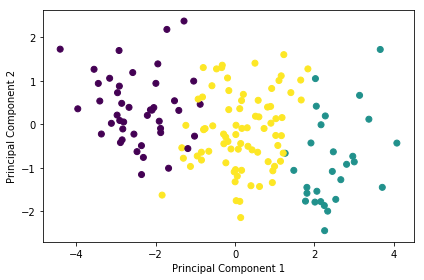

In [1401]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus3.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [1402]:
# analysis of clusters formed
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km1 = pd.concat([df_pca, pd.Series(model_clus3.labels_)], axis=1)
df_pca_km1.columns = ['PC1', 'PC2', 'PC3','PC4','ClusterID']

In [1403]:
df_pca_km1 = pd.merge(df_pca_km1,country_1,on=df_pca_km1['PC1'])
df_pca_km1.shape

(149, 7)

In [1404]:
df_pca_km1 = df_pca_km1.drop('key_0', 1)
df_pca_km1.head()

,PC1,PC2,PC3,PC4,ClusterID,country
0,-2.905050,0.088089,0.718841,0.993710,0,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,2,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,2,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,0,Angola
4,1.028893,0.130097,0.192344,-0.842275,2,Antigua and Barbuda


In [1405]:
df_clusterid3 = pd.merge(df_pca_km1,ngo_data,on='country',how='inner')
df_clusterid3.head()

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1406]:
df_clusterid3.shape

(149, 15)

In [1407]:
km3_clusters_child_mort = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).child_mort.mean())
km3_clusters_exports = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).exports.mean())
km3_clusters_health = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).health.mean())
km3_clusters_imports = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).imports.mean())
km3_clusters_income = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).income.mean())
km3_clusters_inflation = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).inflation.mean())
km3_clusters_life_expec = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).life_expec.mean())
km3_clusters_total_fer = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).total_fer.mean())
km3_clusters_gdpp = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).gdpp.mean())
km3_clusters_PC1 = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).PC1.mean())
km3_clusters_PC2 = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).PC2.mean())
km3_clusters_PC3 = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).PC3.mean())
km3_clusters_PC4 = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).PC4.mean())
#km3_clusters_PC5 = 	pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).PC5.mean())

In [1408]:
df3 = pd.concat([pd.Series([0,1,2]), km3_clusters_child_mort, km3_clusters_exports, km3_clusters_health,km3_clusters_imports,km3_clusters_income,km3_clusters_inflation,km3_clusters_life_expec,km3_clusters_total_fer,km3_clusters_gdpp,km3_clusters_PC1,km3_clusters_PC2,km3_clusters_PC3,km3_clusters_PC4], axis=1)
df3.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df3.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,92.732558,29.604884,6.069535,39.495349,4077.511628,10.460116,59.379070,5.055349,1977.558140,-2.428783,0.364019,0.061477,0.641638
1,1,4.521429,45.200000,9.670714,43.389286,37360.714286,1.154571,80.289286,1.740714,40603.571429,2.445401,-0.830759,0.326261,0.772250
2,2,22.135897,40.183192,6.223718,47.273922,11697.051282,6.989987,72.805128,2.281667,6012.717949,0.166819,-0.146430,0.023138,-0.795092


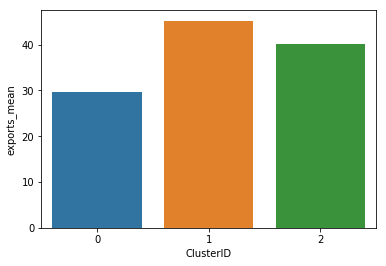

In [1409]:
sns.barplot(x=df3.ClusterID, y=df3.exports_mean)

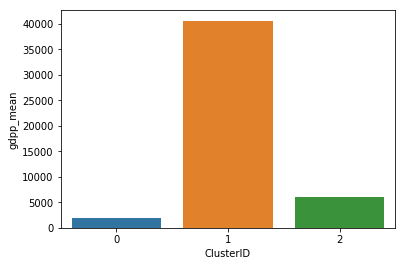

In [1410]:
sns.barplot(x=df3.ClusterID, y=df3.gdpp_mean)

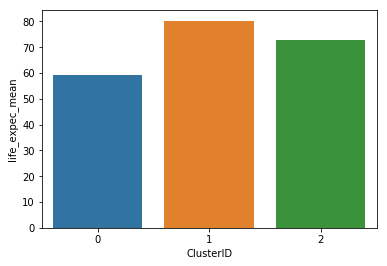

In [1411]:
sns.barplot(x=df3.ClusterID, y=df3.life_expec_mean)

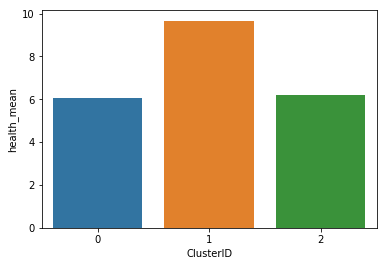

In [1412]:
sns.barplot(x=df3.ClusterID, y=df3.health_mean)

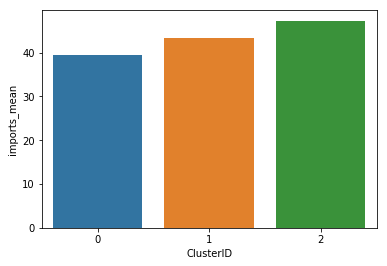

In [1413]:
sns.barplot(x=df3.ClusterID, y=df3.imports_mean)

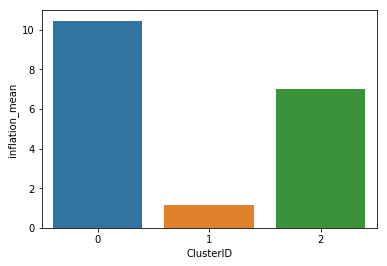

In [1414]:
sns.barplot(x=df3.ClusterID, y=df3.inflation_mean)

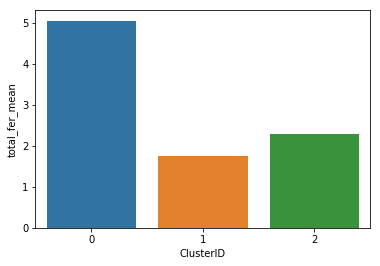

In [1415]:
sns.barplot(x=df3.ClusterID, y=df3.total_fer_mean)

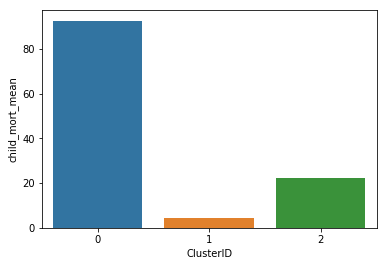

In [1416]:
sns.barplot(x=df3.ClusterID, y=df3.child_mort_mean)

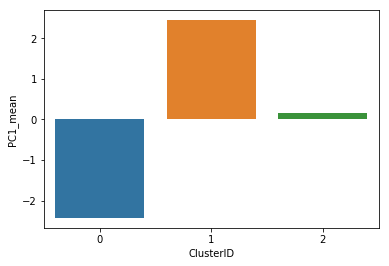

In [1417]:
sns.barplot(x=df3.ClusterID, y=df3.PC1_mean)

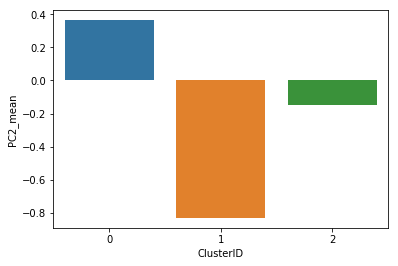

In [1418]:
sns.barplot(x=df3.ClusterID, y=df3.PC2_mean)

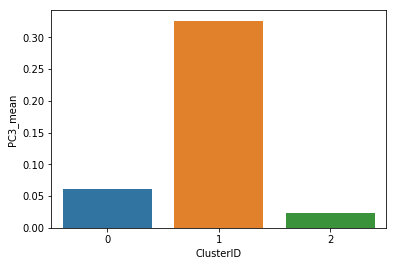

In [1419]:
sns.barplot(x=df3.ClusterID, y=df3.PC3_mean)

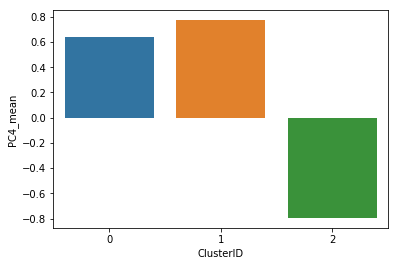

In [1420]:
sns.barplot(x=df3.ClusterID, y=df3.PC4_mean)

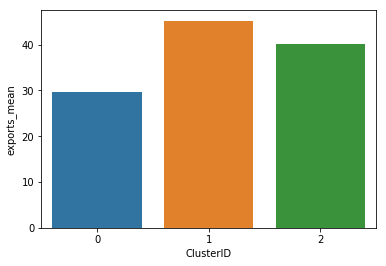

In [1421]:
sns.barplot(x=df3.ClusterID, y=df3.exports_mean)

In [1422]:
pd.DataFrame(df_clusterid3.groupby(["ClusterID"]).country.count())

#km3_clusters_PC4 = 	pd.DataFrame(df_clusterid2.groupby(["ClusterID"]).PC4.mean())

,country
ClusterID,
0,43
1,28
2,78


As per the K-Means clustering with 4 clusters, we can say that the countries belonging to the cluster 2 are in the need of aid from HELP NGO. 
The results obtained are based on the following observations:
- low income
- low gdpp
- high child mortality
- high inflation

In [1430]:

pd.DataFrame(df_clusterid1.loc[df_clusterid1["ClusterID"]==2,'country'])

#pd.DataFrame(df_clusterid1.groupby(["ClusterID"]).country.count())

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
24,Burkina Faso
25,Burundi
27,Cameroon
30,Central African Republic
31,Chad
35,Comoros
